Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
import pickle
import sys

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\envs\prpms\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Function to show various error measurement
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mse = np.mean((forecast - actual)**2)  # MSE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    #corr = np.corrcoef(forecast, actual)[0,1]   # corr
    #mins = np.amin(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #maxs = np.amax(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    #return({'mape':mape, 'me':me, 'mae': mae, 
    #        'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
    #        'corr':corr, 'minmax':minmax})
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'mse':mse, 'rmse':rmse})

In [3]:
import os
os.chdir('d:/Users/mokky/Documents/GitHub/nus-iss/PRS-PM-ISY5002-GROUP5/SystemCode')
print(os.getcwd())

d:\Users\mokky\Documents\GitHub\nus-iss\PRS-PM-ISY5002-GROUP5\SystemCode


In [4]:
file_dir = './Data Exploration/data/uc3/'
X_train_file_path = 'all_hosp_new_train_X_uc3.pkl'
y_train_file_path = 'all_hosp_data_uc3_y_train_uc3.pkl'
X_test_file_path = 'all_hosp_new_test_X_uc3.pkl'
y_test_file_path = 'all_hosp_data_uc3_y_test_uc3.pkl'

In [12]:
df_X_train = pd.read_pickle(file_dir + X_train_file_path)
df_y_train = pd.read_pickle(file_dir + y_train_file_path)
df_X_test = pd.read_pickle(file_dir + X_test_file_path)
df_y_test = pd.read_pickle(file_dir + y_test_file_path)

In [13]:
XGBModel = XGBRegressor()
XGBModel.fit(df_X_train,df_y_train , verbose=True)

# save model to file
pickle.dump(XGBModel, open(file_dir + "uc3_xgbreg_model_pkl.sav", "wb"))

In [14]:
XGBpredictions = XGBModel.predict(df_X_test)

C:\ProgramData\Anaconda3\envs\prpms\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


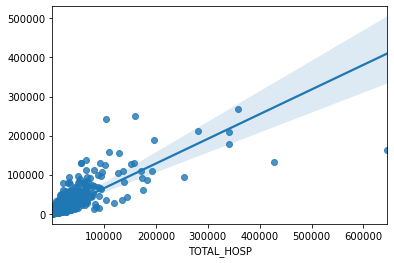

In [15]:
sns.regplot(df_y_test,XGBpredictions)

In [16]:
# MSE
print('Mean squared error: %.2f'
      % mean_squared_error(df_y_test,XGBpredictions, squared=True))

# RMSE
print('Root Mean squared error: %.2f'
      % mean_squared_error(df_y_test,XGBpredictions, squared=False))

# MAE
print('Mean absolute error: %.2f'
      % mean_absolute_error(df_y_test,XGBpredictions))

Mean squared error: 49369558.73
Root Mean squared error: 7026.35
Mean absolute error: 2237.76


In [17]:
forecast_accuracy(XGBpredictions, df_y_test)

{'mape': 0.46337955520919316,
 'me': -81.64403423137739,
 'mae': 2237.757650049478,
 'mpe': 0.26924646510863176,
 'mse': 49369558.733084954,
 'rmse': 7026.347467431778}